##Part 1

CONTEXT: Classification  is  probably  the  most  popular  task  that  you  would  deal  with  in  real  life.  Text  in  the  form  of  blogs,  posts,  articles, etc.  is  written  every  second.  It  is  a  challenge  to  predict  the  information  about  the  writer  without  knowing  about  him/her.  We  are  going  to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

###Import Packages :


In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


###Load Dataset :


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv('/content/drive/My Drive/NLP/blogtext.csv')
data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


###Checking for null values in the dataset :

In [100]:
#Let's check for null values
data.isna().any()

id        False
gender    False
age       False
topic     False
sign      False
date      False
text      False
dtype: bool

### We see that there are no null values in the dataset.

###Let's visualize from dataset to get some insights :

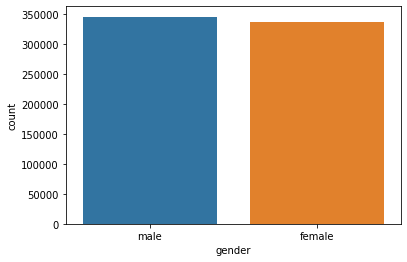

In [102]:
sns.countplot(x ='gender',data=data)

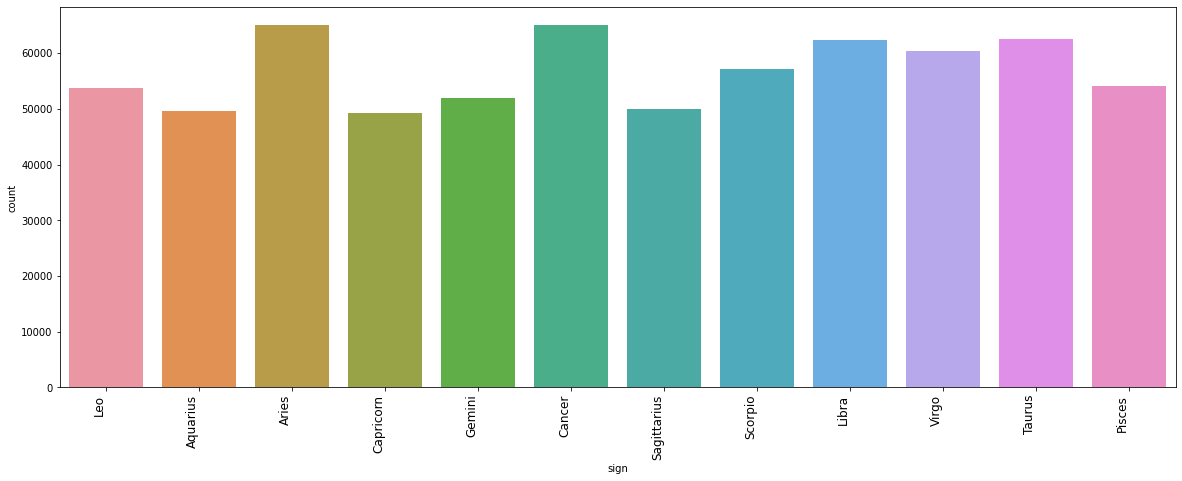

<Figure size 1296x864 with 0 Axes>

In [9]:
ax = sns.countplot(x="sign", data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.rcParams["figure.figsize"] = (20, 7)
plt.figure(figsize=(18,12))
plt.rcParams["xtick.labelsize"] = 12
plt.show()

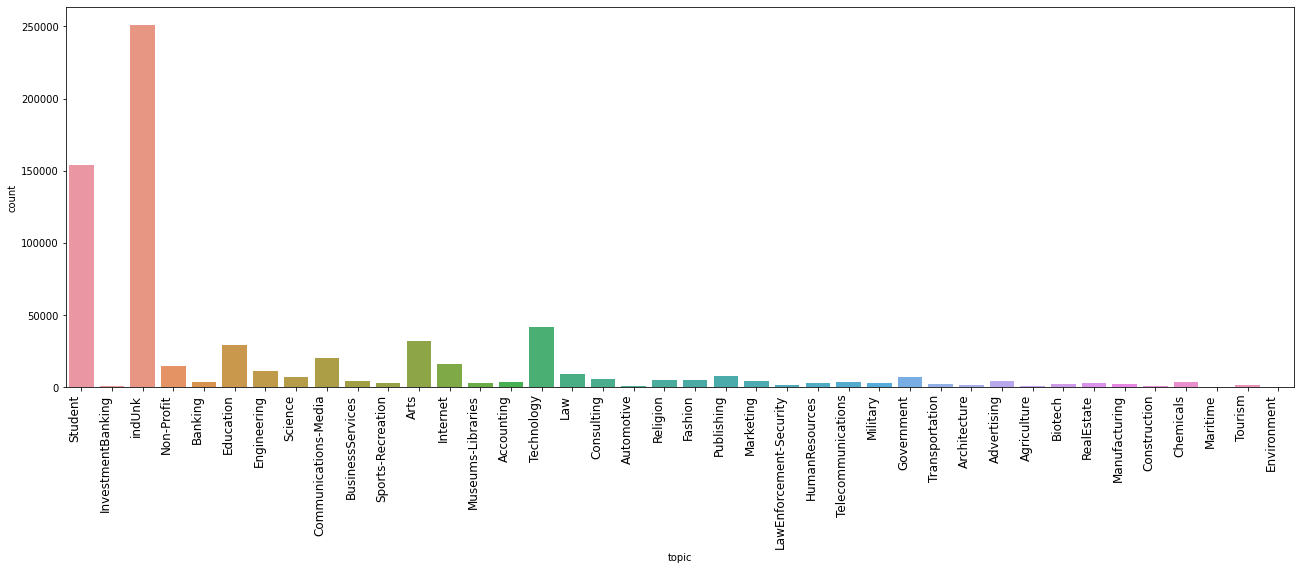

<Figure size 1296x864 with 0 Axes>

In [8]:
ax = sns.countplot(x="topic", data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.rcParams["figure.figsize"] = (20, 7)
plt.figure(figsize=(18,12))
plt.rcParams["xtick.labelsize"] = 12
plt.show()


In [12]:
#Now let's check the shape of the data
data.shape

(681284, 7)

### We see that there are 68,124 records in our dataset and for such large data, analysis and computation can be very complex, resource intensive and costly. Therefore, we will take a subset of our dataset and rerun with the entire data-set once all errors are fixed and optimization is performed.

###We will take 10000 records as our subset from given dataset.

In [13]:
data=data.head(10000)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   gender  10000 non-null  object
 2   age     10000 non-null  int64 
 3   topic   10000 non-null  object
 4   sign    10000 non-null  object
 5   date    10000 non-null  object
 6   text    10000 non-null  object
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [15]:
#We will remove id, date columns since they aren't much relevant for our analysis
data.drop(['id','date'], axis=1, inplace=True)

In [16]:
data.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...


In [19]:
#Convert to object data type
data['age']=data['age'].astype('object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  10000 non-null  object
 1   age     10000 non-null  object
 2   topic   10000 non-null  object
 3   sign    10000 non-null  object
 4   text    10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB


###Now we see that all our attributes are converted to object data type.

###We will now do Data cleaning or Data Wrangling for 'text' column to remove all unwanted texts.


a. Remove unwanted characters

b. Convert text to lowercase

c. Remove unwanted spaces

d. Remove stopwords

In [21]:
data['clean_data']=data['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [22]:
data['clean_data']=data['clean_data'].apply(lambda x: x.lower())

In [23]:
data['clean_data']=data['clean_data'].apply(lambda x: x.strip())

In [24]:
#Let's check our data after transforamtion
print("Original data : {}".format(data['text'][1]))

Original data :            These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          


In [25]:
print("Data after cleaning : {}".format(data['clean_data'][1]))

Data after cleaning : these are the team members drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering me urllink mail


###Removing all Stop Words :

In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
stopwords=set(stopwords.words('english'))

In [34]:
data['clean_data']=data['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

In [36]:
data['clean_data'][10]

'ah korean language looks difficult first figure read hanguel korea surprisingly easy learn alphabet characters seems easy vocabulary starts oh backwards us sentence structure yikes luckily many options us slow witted foreigners take language course could list urllink joongang article says lot resources urllink well guy motivation jeon ji hyun latest something actually star movies cfs hear means commercial feature positive saw latest movie sunday night hard describe name english version windstruck korean version yeochinso short ne yeojachingu rul sogayhamnida like introduce girlfriend surprisingly titles make sense like website korean english looks quite good actually urllink movie shown theatres subtitles special times info urllink list many theatres seoul click urllink urllink great reason learn korean already married went foreigners well local korean national course korean take picture put urllink movie hof bar update bud mine passed urllink link giordano ad apparently aired korea n

###Now we will merge all the other columns into labels columns :

In [37]:
data['labels']=data.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)

In [38]:
data.head()

,gender,age,topic,sign,text,clean_data,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [39]:
data=data[['clean_data','labels']]

In [40]:
data.head()

,clean_data,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


###Splitting the dataset into X and Y respectively :




In [41]:
X=data['clean_data']

In [42]:
Y=data['labels']

###Now we will perform count vectorizer with bi-grams and tri-grams to get the count vectors of the X data :

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer=CountVectorizer(binary=True, ngram_range=(1,2))

In [45]:
X=vectorizer.fit_transform(X)

In [46]:
X[1]

<1x643302 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

###Now let's see some feature name :


In [53]:
vectorizer.get_feature_names()[:5]

['aa', 'aa amazing', 'aa anger', 'aa compared', 'aa keeps']

In [51]:
label_counts=dict()

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label]+=1
        else:
            label_counts[label]=1

In [52]:
label_counts

{'13': 42,
 '14': 212,
 '15': 602,
 '16': 440,
 '17': 1185,
 '23': 253,
 '24': 655,
 '25': 386,
 '26': 234,
 '27': 1054,
 '33': 136,
 '34': 553,
 '35': 2315,
 '36': 1708,
 '37': 33,
 '38': 46,
 '39': 79,
 '40': 1,
 '41': 20,
 '42': 14,
 '43': 6,
 '44': 3,
 '45': 16,
 '46': 7,
 'Accounting': 4,
 'Aquarius': 571,
 'Aries': 4198,
 'Arts': 45,
 'Automotive': 14,
 'Banking': 16,
 'BusinessServices': 91,
 'Cancer': 504,
 'Capricorn': 215,
 'Communications-Media': 99,
 'Consulting': 21,
 'Education': 270,
 'Engineering': 127,
 'Fashion': 1622,
 'Gemini': 150,
 'HumanResources': 2,
 'Internet': 118,
 'InvestmentBanking': 70,
 'Law': 11,
 'LawEnforcement-Security': 10,
 'Leo': 301,
 'Libra': 491,
 'Marketing': 156,
 'Museums-Libraries': 17,
 'Non-Profit': 71,
 'Pisces': 454,
 'Publishing': 4,
 'Religion': 9,
 'Sagittarius': 1097,
 'Science': 63,
 'Scorpio': 971,
 'Sports-Recreation': 80,
 'Student': 1137,
 'Taurus': 812,
 'Technology': 2654,
 'Telecommunications': 2,
 'Virgo': 236,
 'female': 4

###Pre-processing the labels :


We see that each example can have multiple tags. To deal with such kind of predictions, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn.

In [54]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [55]:
Y=binarizer.fit_transform(data.labels)

###Splitting the dataset into train and test data in the ratio 80:20 respectively :

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

In [62]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


###Choosing a classifier :

Here, we use One-vs-Rest approach, which is implemented in OneVsRestClassifier class, where there are k classifiers (= number of tags) that are trained. As a basic classifier,we will use LogisticRegression . It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.

In [59]:
model=LogisticRegression(solver='lbfgs')

In [60]:
model=OneVsRestClassifier(model)

In [61]:
model.fit(Xtrain,Ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [63]:
Ypred=model.predict(Xtest)

In [64]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(Ytest)

In [65]:
for i in range(5):
    print('Text:\t{}\nActual labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        Xtest[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

Text:	  (0, 487360)	1
  (0, 312628)	1
  (0, 319058)	1
  (0, 450189)	1
  (0, 113776)	1
  (0, 131554)	1
  (0, 192891)	1
  (0, 564667)	1
  (0, 493961)	1
  (0, 139077)	1
  (0, 477858)	1
  (0, 205401)	1
  (0, 630587)	1
  (0, 567161)	1
  (0, 248962)	1
  (0, 229515)	1
  (0, 14389)	1
  (0, 194964)	1
  (0, 629626)	1
  (0, 192374)	1
  (0, 67694)	1
  (0, 469055)	1
  (0, 170072)	1
  (0, 256867)	1
  (0, 390349)	1
  :	:
  (0, 319536)	1
  (0, 249159)	1
  (0, 104173)	1
  (0, 170979)	1
  (0, 509194)	1
  (0, 198524)	1
  (0, 259130)	1
  (0, 333860)	1
  (0, 441251)	1
  (0, 235915)	1
  (0, 14682)	1
  (0, 191659)	1
  (0, 219772)	1
  (0, 313790)	1
  (0, 235649)	1
  (0, 118993)	1
  (0, 323388)	1
  (0, 407396)	1
  (0, 329643)	1
  (0, 630824)	1
  (0, 191624)	1
  (0, 104189)	1
  (0, 121166)	1
  (0, 459564)	1
  (0, 125670)	1
Actual labels:	34,Sagittarius,female,indUnk
Predicted labels:	34,Sagittarius,female,indUnk


Text:	  (0, 593438)	1
  (0, 312628)	1
  (0, 319058)	1
  (0, 607406)	1
  (0, 164559)	1
  (0, 450189

###We will write a function to print evalutaion metrics :

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_results(Ytest, Ypred):
    print('Accuracy score : ', accuracy_score(Ytest, Ypred))
    print('F1 score : ', f1_score(Ytest, Ypred, average='micro'))
    print('Average Precision score : ', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average Recall score : ', recall_score(Ytest, Ypred, average='micro'))

In [68]:
#We will print our evaluation results
print_evaluation_results(Ytest, Ypred)

Accuracy score :  0.3325
F1 score :  0.646484375
Average Precision score :  0.4645899143448795
Average Recall score :  0.537875


### Trying with Different Classifier (SVM) :

In [90]:
from sklearn.svm import LinearSVC

In [95]:
model = LinearSVC(penalty='l1', dual=False, loss='squared_hinge')
model = OneVsRestClassifier(model)
model.fit(Xtrain, Ytrain)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l1',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [ ]:
Ypred=model.predict(Xtest)

In [98]:
print_evaluation_results(Ytest, Ypred)

Accuracy score :  0.3355
F1 score :  0.6699129003497702
Average Precision score :  0.47741805481689714
Average Recall score :  0.6105


###We see that even trying with a different classifier (SVM), accuracy doesn't seem to increase much.

###Conclusion :

We have solved Multilabel classification problem that predicts multiple features from given text.

Loading the data and required basic EDA and data inspection has been done
The text has been pre processed like cleansing it (removing the unnecessary characters, removing the spaces, converting the case to lower) and also removing the stop words, vectorizing the features.

Then, we splitted the cleaned dataset to train and test data in the ratio 80:20.


Using multilable binarizers, also classifier models (Logistic Regression and SVM) are trained and the predictions are made and also the accuracy, f1 score, Avg precision and recall scores are calculated.




----------------------------------------------------------X-------------------------------------------------X-----------------------------------------------------------------





#Part 2

###CONTEXT: Great  Learning  has  a  an  academic  support  department  which  receives  numerous  support  requests  every  day  throughout  the year.  Teams  are  spread  across  geographies  and  try  to  provide  support  round  the  year.  Sometimes  there  are  circumstances  where  due  to heavy  workload  certain  request  resolutions  are  delayed,  impacting  company’s  business.  Some  of  the  requests  are  very  generic  where  a proper resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human support executive if the request is complex or not in it’s database.

In [10]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import necessary packages :

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
intents_file = open('/content/drive/MyDrive/NLP/GL Bot.json').read()
intents = json.loads(intents_file)

###Now we use NLTK library :

In [13]:
nltk.download('punkt')
words=[]
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.']
for intent in intents['intents']:
    for pattern in intent['patterns']:
        
        #tokenize each word
        word = nltk.word_tokenize(pattern)
        words.extend(word)
        
        #add documents in the corpus
        documents.append((word, intent['tag']))
        
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
print(documents)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[(['hi'], 'Intro'), (['how', 'are', 'you'], 'Intro'), (['is', 'anyone', 'there'], 'Intro'), (['hello'], 'Intro'), (['whats', 'up'], 'Intro'), (['hey'], 'Intro'), (['yo'], 'Intro'), (['listen'], 'Intro'), (['please', 'help', 'me'], 'Intro'), (['i', 'am', 'learner', 'from'], 'Intro'), (['i', 'belong', 'to'], 'Intro'), (['aiml', 'batch'], 'Intro'), (['aifl', 'batch'], 'Intro'), (['i', 'am', 'from'], 'Intro'), (['my', 'pm', 'is'], 'Intro'), (['blended'], 'Intro'), (['online'], 'Intro'), (['i', 'am', 'from'], 'Intro'), (['hey', 'ya'], 'Intro'), (['talking', 'to', 'you', 'for', 'first', 'time'], 'Intro'), (['thank', 'you'], 'Exit'), (['thanks'], 'Exit'), (['cya'], 'Exit'), (['see', 'you'], 'Exit'), (['later'], 'Exit'), (['see', 'you', 'later'], 'Exit'), (['goodbye'], 'Exit'), (['i', 'am', 'leaving'], 'Exit'), (['have', 'a', 'Good', 'day'], 'Exit'), (['you', 'helped', 'me'], 'Exit'),

In [14]:
nltk.download('wordnet')

# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))

# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents
print (len(documents), "documents")

# classes = intents
print (len(classes), "classes", classes)

# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
128 documents
8 classes ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']
158 unique lemmatized words ['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'n

###Creating Training Dataset : 

In [16]:
training = []
# create empty array for the output
output_empty = [0] * len(classes)

# training set, bag of words for every sentence
for doc in documents:
    bag = []
    word_patterns = doc[0]
    
    # lemmatize each word - create base word, in attempt to represent related words
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    
    # create the bag of words array with 1, if word is found in current pattern
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

# shuffle the features and make numpy array
random.shuffle(training)
training = np.array(training)

# create training and testing lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])

###Now we define our Neural Netweok Model : 

In [17]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#Training and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)


Epoch 1/200
26/26 [==============================] - 1s 1ms/step - loss: 2.1099 - accuracy: 0.1557 
Epoch 2/200
26/26 [==============================] - 0s 1ms/step - loss: 1.9484 - accuracy: 0.2812
Epoch 3/200
26/26 [==============================] - 0s 1ms/step - loss: 1.8105 - accuracy: 0.2551
Epoch 4/200
26/26 [==============================] - 0s 1ms/step - loss: 1.7579 - accuracy: 0.3793
Epoch 5/200
26/26 [==============================] - 0s 1ms/step - loss: 1.6766 - accuracy: 0.3407
Epoch 6/200
26/26 [==============================] - 0s 1ms/step - loss: 1.5863 - accuracy: 0.4128
Epoch 7/200
26/26 [==============================] - 0s 2ms/step - loss: 1.5571 - accuracy: 0.3426
Epoch 8/200
26/26 [==============================] - 0s 1ms/step - loss: 1.3485 - accuracy: 0.5964
Epoch 9/200
26/26 [==============================] - 0s 1ms/step - loss: 1.1322 - accuracy: 0.6371
Epoch 10/200
26/26 [==============================] - 0s 2ms/step - loss: 1.2416 - accuracy: 0.5364
Epoch 11

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               20352     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 29,128
Trainable params: 29,128
Non-trainable params: 0
_________________________________________________________________


In [19]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
model = load_model('/content/chatbot_model.h5')
import json
import random
from nltk.corpus import wordnet

###Now from the given dataset, we read tags and their examples :

In [21]:
intents = json.loads(open('/content/drive/MyDrive/NLP/GL Bot.json').read())

In [22]:
print(intents)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [26]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###Funtion to perform cleanup operations : 

In [27]:
def clean_up_sentence(sentence):
    # tokenize the pattern - splitting words into array
    sentence_words = nltk.word_tokenize(sentence)
    
    # stemming every word - reducing to base form
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    
    return sentence_words


###Funtion to return Bag of Words :

In [31]:
def bag_of_words(sentence, words, show_details=True):
    # tokenizing patterns
    sentence_words = clean_up_sentence(sentence)
    
    # bag of words - vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,word in enumerate(words):
            if word == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                
                if show_details:
                    print ("found in bag: %s" % word)
    
    return(np.array(bag))

###Function to predict the class :

In [32]:
def predict_class(sentence):
    # filter below  threshold predictions
    p = bag_of_words(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    
    # sorting strength probability
    results.sort(key=lambda x: x[1], reverse=True)
    
    return_list = []
    
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    
    return return_list

###Funtion to get response :

In [33]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

In [34]:
print(intents['intents'])

[{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of problem with 

###Now we will test our chat utility :

In [37]:
# Text chat utility function
from nltk.corpus import wordnet
def chat():
    print("Chat with Ramos(type: stop to quit)")
    print("If the answer is not right(type:*)")
    while True:
        inp=input("\n\nYou:")
        
        if inp.lower()=="*":
            print("BOT:Please rephrase your question and try again")
        
        if inp.lower()=="quit":
            break
        
        ints = predict_class(inp)
        print(ints)
        
        res = getResponse(ints, intents)
        print(res)
        
chat()

Chat with Ramos(type: stop to quit)
If the answer is not right(type:*)


You:Hello
[{'intent': 'Intro', 'probability': '0.9998907'}]
Hello! how can i help you ?


You:how are you
[{'intent': 'Intro', 'probability': '0.99973935'}]
Hello! how can i help you ?


You:ml
[{'intent': 'SL', 'probability': '0.9999883'}]
Link: Machine Learning wiki 


You:nn
[{'intent': 'NN', 'probability': '0.42720532'}, {'intent': 'SL', 'probability': '0.39161453'}]
Link: Neural Nets wiki


You:hell
[{'intent': 'Profane', 'probability': '0.9940089'}]
Please use respectful words


You:quit


###Conclusion :

We can clearly see that our chat utility works fine on our inputs. It categorized the query into tags and also respond with appropriate results. It continues to work in an infinnite loop until we try to quit the chat. 

Also, after identifying or mapping query to categories, it also calulates the probabilities and result with maximum probability is returned.

We started with cleaning up our data, creating training data and then defined our neural network. After that we defined functions to identify classes, return bag of words and also return response to our queries.

At the end, we find that our chat utility works fine on our queries, classifying it into categories and also responding with appropriate responses.

